In [1]:
import pandas as pd

file_path = "C:/Users/Admin/OneDrive/Desktop/Data analyst/Project 2/Cleaned_Data.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
df.head()


,Segment,Ship Mode,OrderID,Sales
0,Consumer,First Class,CA-2011-103366,149.950
1,Consumer,First Class,CA-2011-109043,243.600
2,Consumer,First Class,CA-2011-113166,9.568
3,Consumer,First Class,CA-2011-124023,8.960
4,Consumer,First Class,CA-2011-130155,34.200


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Segment    834 non-null    object 
 1   Ship Mode  834 non-null    object 
 2   OrderID    834 non-null    object 
 3   Sales      834 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.2+ KB


,Sales
count,834.000000
mean,939.381067
std,5501.725051
min,1.167000
25%,35.072000
50%,174.513000
75%,561.519375
max,116922.134500


In [3]:

df.isnull().sum()



Segment      0
Ship Mode    0
OrderID      0
Sales        0
dtype: int64

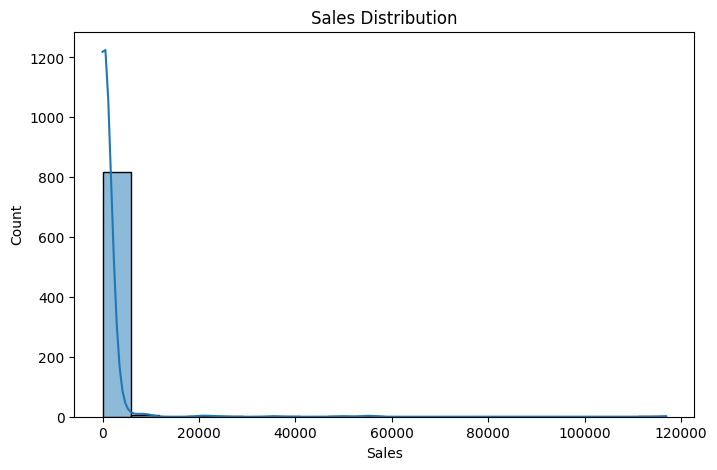

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title("Sales Distribution")
plt.show()


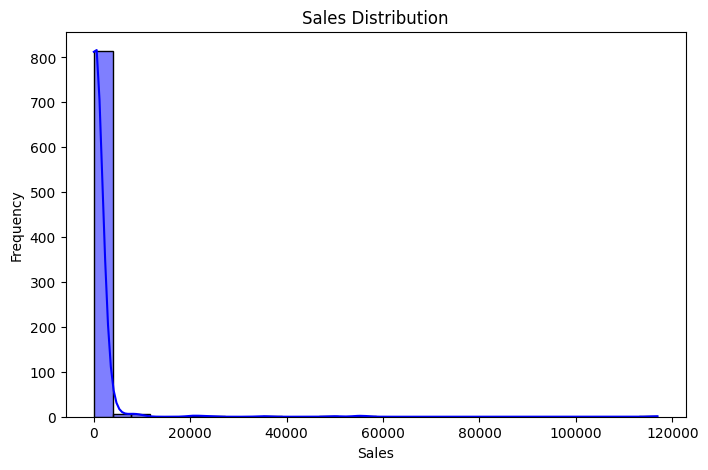

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7864\4144337569.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Segment'], y=df['Sales'], estimator=sum, ci=None, palette="viridis")
C:\Users\Admin\AppData\Local\Temp\ipykernel_7864\4144337569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Segment'], y=df['Sales'], estimator=sum, ci=None, palette="viridis")


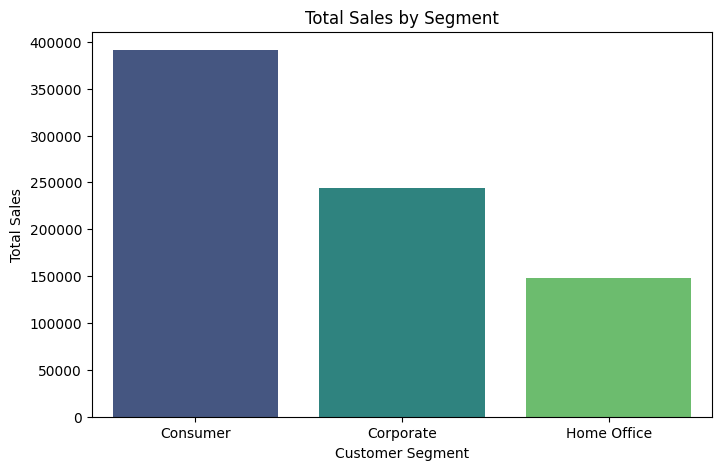

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Segment'], y=df['Sales'], estimator=sum, ci=None, palette="viridis")
plt.title("Total Sales by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.show()


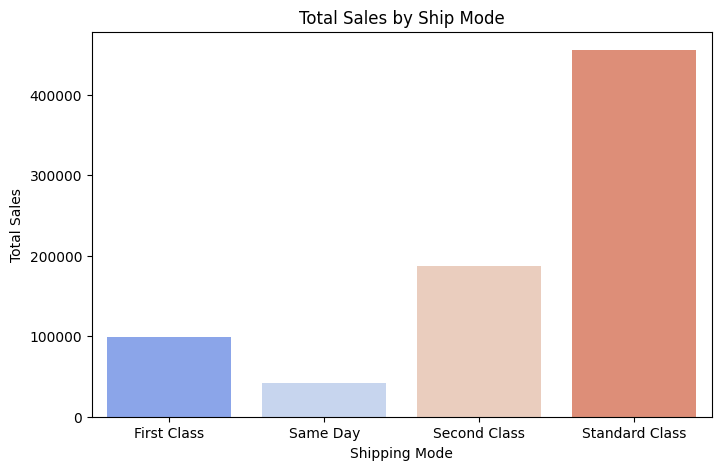

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Ship Mode'], y=df['Sales'], hue=df['Ship Mode'], estimator=sum, errorbar=None, palette="coolwarm", legend=False)
plt.title("Total Sales by Ship Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Total Sales")
plt.show()



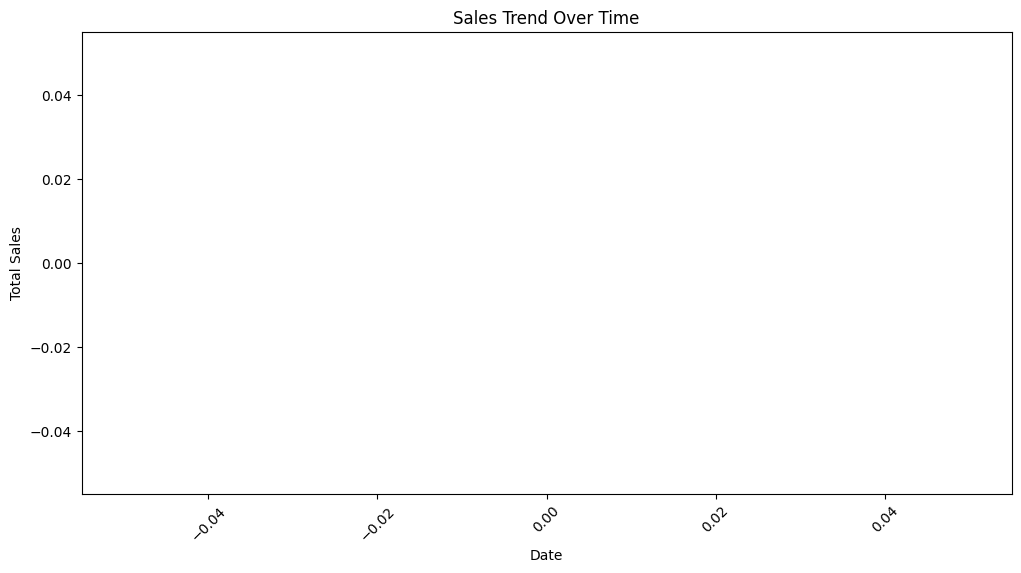

In [14]:
df['OrderID'] = pd.to_datetime(df['OrderID'], format='%Y-%m-%d', errors='coerce')  # Change format if needed
df = df.dropna(subset=['OrderID'])  # Remove rows where OrderID couldn't be converted

df_grouped = df.groupby(df['OrderID'].dt.date)['Sales'].sum().sort_index()  # Sort by date

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()



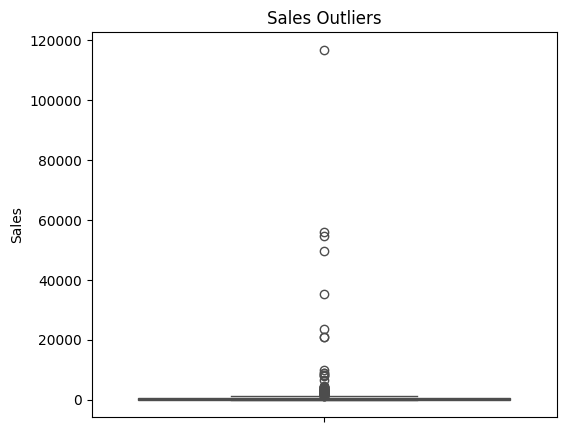

In [10]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Sales'], color='orange')
plt.title("Sales Outliers")
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


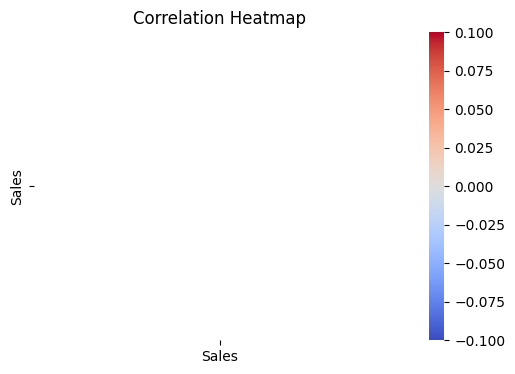

In [15]:
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
